In [23]:
conda install -c anaconda quandl

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [25]:
conda install -c anaconda keras

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [27]:
conda install -c anaconda TensorFlow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [29]:
import quandl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


#from tensorflow import keras
#from tensorflow.keras import backend
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from sklearn.metrics import mean_squared_error




In [31]:
quandl.ApiConfig.api_key = "zSe_bKsyRtCbBxWJ5HZ9"

In [33]:
StartDate= "2010-9-26"
EndDate = "2019-9-25"

#StartDate_test = "2019-9-26"
#EndDate_test = "2019-11-26"

live_data = quandl.get("CHRIS/CME_LC1", start_date = StartDate, 
                  end_date = EndDate)
feeder_data = quandl.get("CHRIS/CME_FC1", start_date = StartDate, 
                  end_date = EndDate)
corn_data = quandl.get("CHRIS/CME_C1", start_date = StartDate, 
                  end_date = EndDate)

#live_data_test = quandl.get("CHRIS/CME_LC1", start_date = StartDate_test, 
                  #end_date = EndDate_test)
#feeder_data_test = quandl.get("CHRIS/CME_FC1", start_date = StartDate_test, 
                  #end_date = EndDate_test)
#corn_data_test = quandl.get("CHRIS/CME_C1", start_date = StartDate_test, 
                  #end_date = EndDate_test)


#pulled from https://blog.quandl.com/api-for-commodity-data
#Corn = CHRIS/CME_C1
#Feeder Cattle = CHRIS/CME_FC1

In [35]:
live_data = live_data.reset_index()
#live_data_test = live_data_test.reset_index()

feeder_data = feeder_data.reset_index()
#feeder_data_test = feeder_data_test.reset_index()

corn_data = corn_data.reset_index()
#corn_data_test = corn_data_test.reset_index()

live_data.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
2258,2019-09-19,100.250,100.625,99.625,99.800,0.575,99.800,12167.0,51486.0
2259,2019-09-20,99.925,100.125,98.950,99.800,0.450,99.350,10525.0,47429.0
2260,2019-09-23,100.500,102.100,100.500,102.075,2.500,101.850,10727.0,43959.0
2261,2019-09-24,101.750,102.875,101.650,102.325,0.275,102.125,11800.0,41226.0
2262,2019-09-25,102.300,103.250,102.025,103.200,0.875,103.000,8452.0,38343.0


In [37]:
corn_data.shape

(2267, 9)

In [39]:
live_data.shape

(2263, 9)

In [41]:
feeder_data.shape

(2264, 9)

In [43]:
feeder_data.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2010-09-27,109.70,109.98,109.50,109.88,NaN,109.88,679.0,1287.0
1,2010-09-28,109.95,110.13,109.95,110.00,NaN,110.00,314.0,1321.0
2,2010-09-29,109.50,109.58,109.45,109.48,NaN,109.48,314.0,1321.0
3,2010-09-30,109.95,110.00,109.90,109.93,NaN,109.93,412.0,1320.0
4,2010-10-01,110.03,110.03,110.03,110.03,NaN,110.03,304.0,1214.0


In [45]:
cattle_merge = pd.merge(live_data, feeder_data, left_on = 'Date', right_on = 'Date', how = 'left')
com_merge = pd.merge(corn_data, cattle_merge, left_on = 'Date', right_on = 'Date', how = 'left')
com_merge.shape
#y = feeders, x = live, none = corn


(2267, 25)

In [47]:
#cattle_merge_test = pd.merge(live_data_test, feeder_data_test, left_on = 'Date', right_on = 'Date', how = 'left')
#com_merge_test = pd.merge(corn_data_test, cattle_merge_test, left_on = 'Date', right_on = 'Date', how = 'left')
#com_merge_test.shape

In [49]:
com_merge = com_merge.dropna()
com_merge.shape

(1312, 25)

In [51]:
#com_merge_test = com_merge_test.dropna()
#com_merge_test.shape

In [53]:
com_merge.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Open_x,...,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
853,2014-02-18,445.00,450.00,444.50,449.4,4.2,449.50,140856.0,332167.0,143.125,...,3170.0,12231.0,170.700,171.950,170.600,171.700,1.225,171.700,2951.0,12118.0
854,2014-02-19,448.50,455.25,448.25,454.6,4.2,453.75,243252.0,307257.0,143.725,...,4006.0,11113.0,171.650,172.100,171.000,171.150,0.525,171.175,2357.0,11190.0
855,2014-02-20,453.25,456.50,451.00,456.2,2.0,455.75,191899.0,268137.0,143.800,...,2803.0,9330.0,171.475,171.625,170.875,171.100,0.050,171.125,1607.0,10746.0
856,2014-02-21,455.50,456.50,450.25,452.2,2.6,453.00,145346.0,244376.0,144.950,...,4086.0,8240.0,171.225,171.600,170.625,170.675,0.425,170.700,1723.0,10249.0
857,2014-02-24,451.50,452.75,445.50,451.4,1.4,451.50,142118.0,200173.0,144.700,...,2708.0,6175.0,170.900,171.350,170.150,170.175,0.500,170.200,1969.0,9793.0


In [55]:
#TensorFlow attempt
from __future__ import absolute_import, division, print_function, unicode_literals

# Univariate

In [57]:
# Function to pull in the  windows of time to train the model

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [59]:
#Use the first 900 rows of data to be the training dataset, the remaining will be the validation, 900 days
TRAIN_SPLIT = 900
tf.random.set_seed(13)

In [61]:
#Pulling out the settle / close for feeder cattle and use that only to predict the future value
uni_data=com_merge['Settle_y']
uni_data.index = com_merge['Date']
uni_data.head()

Date
2014-02-18    171.700
2014-02-19    171.175
2014-02-20    171.125
2014-02-21    170.700
2014-02-24    170.200
Name: Settle_y, dtype: float64

In [63]:
#plot out the close out price for sanity check
#uni_data.plot(subplots=True)
uni_data.shape

(1312,)

In [65]:
uni_data = uni_data.values
#Normalizing the dataset to use in a neural network
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [67]:
#Give the model the last 50 points of close out prices and predict the next time step
univariate_past_history = 50
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [69]:
print('Past close out prices')
#print(x_train_uni[0])
print('\n Target feeder close out price')
print(y_train_uni[0])

Past close out prices

 Target feeder close out price
0.2205409315233903


In [71]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

In [73]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\abe_irlbeck\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

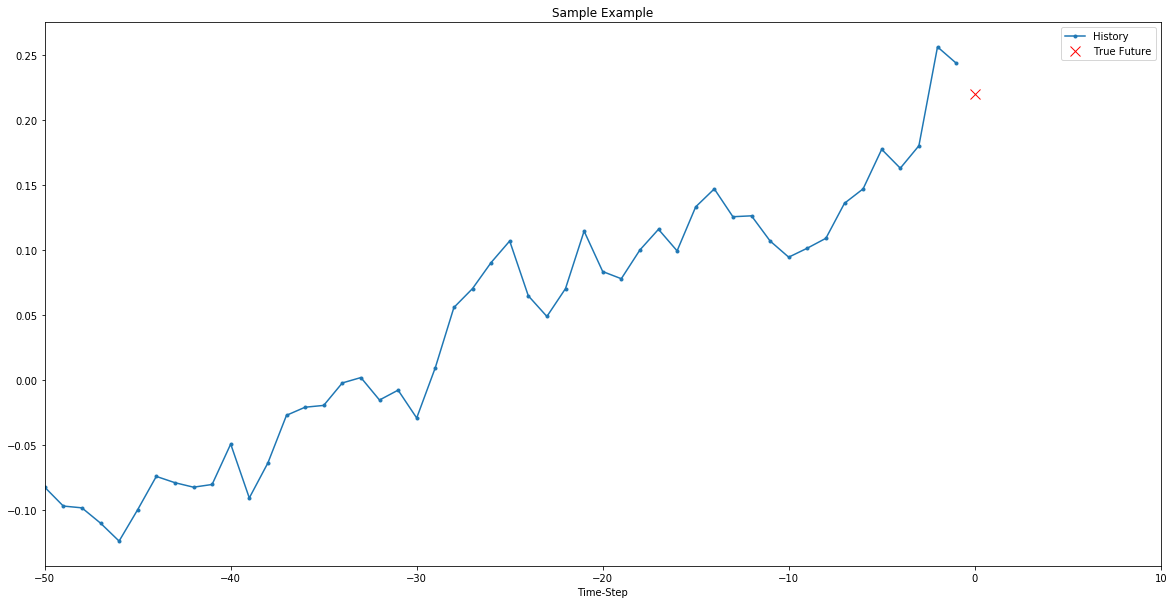

In [75]:
plt.figure(figsize=(20,10))
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

<module 'matplotlib.pyplot' from 'C:\\Users\\abe_irlbeck\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

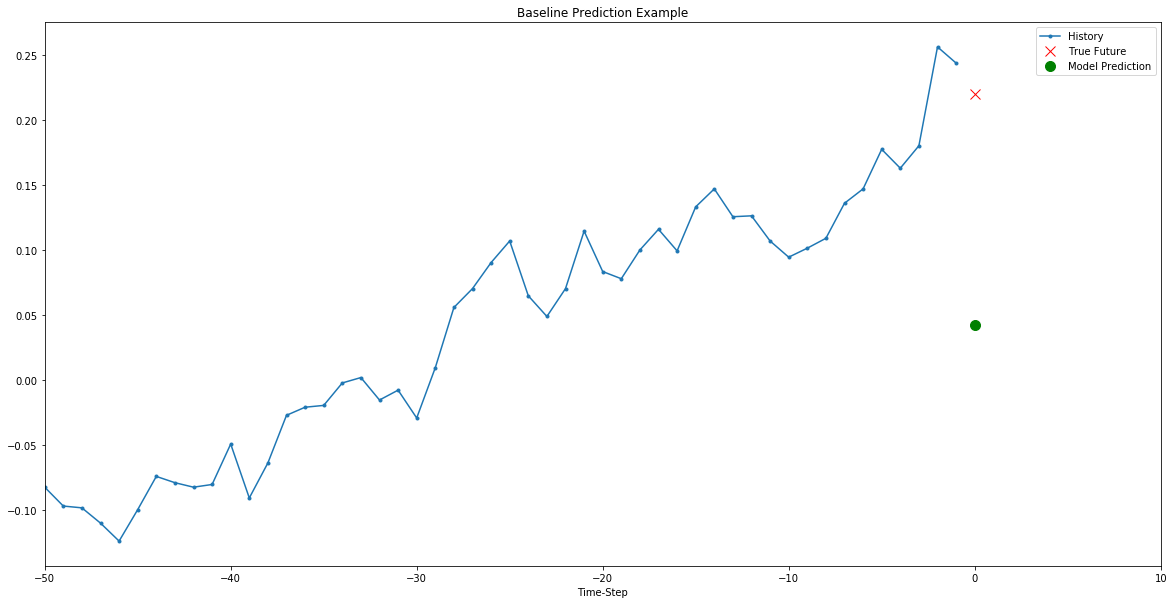

In [77]:
#Simple Baseline, predicts next point off of last 50 through averages
def baseline(history):
  return np.mean(history)
plt.figure(figsize=(20,10))
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [79]:
#Now use a Recurrent Neural Network(LSTM) to see if we can beat this baseline (average) model prediction

#Parameters
BATCH_SIZE = 256
BUFFER_SIZE = 10000

#Shuffle, batch and cache the dataset
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [81]:
#LSTM model requires the input shape of data it is given
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [83]:
#Sample prediction to check output of model
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [85]:
#Training parameters and training
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 11s 56ms/step - loss: 0.3238 - val_loss: 0.0567
Epoch 2/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0850 - val_loss: 0.0485
Epoch 3/10
200/200 [==============================] - 8s 40ms/step - loss: 0.0677 - val_loss: 0.0438
Epoch 4/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0615 - val_loss: 0.0407
Epoch 5/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0565 - val_loss: 0.0388
Epoch 6/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0524 - val_loss: 0.0372
Epoch 7/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0493 - val_loss: 0.0357
Epoch 8/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0467 - val_loss: 0.0350
Epoch 9/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0449 - val_loss: 0.0341
Epoch 10/10
200/200 [==========================

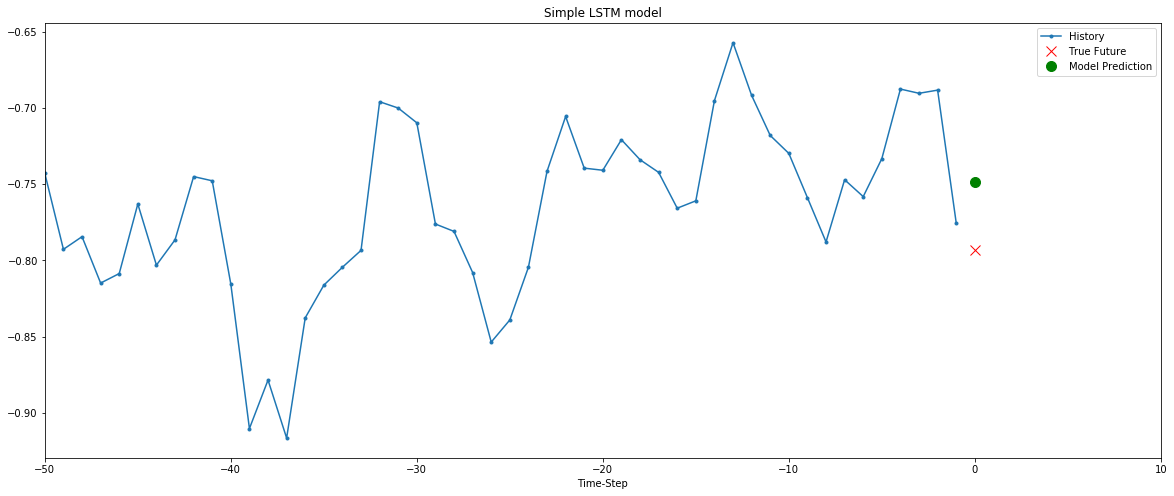

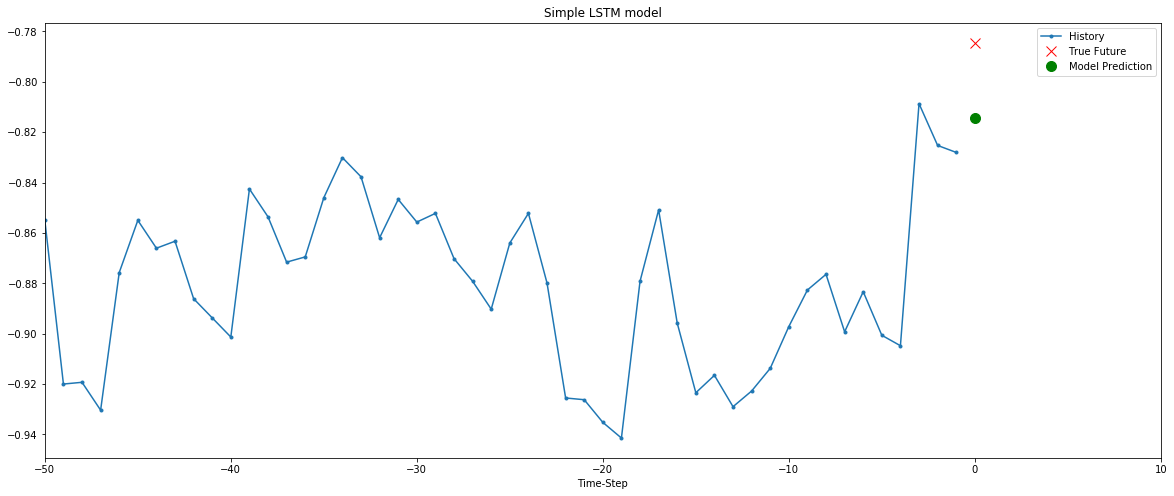

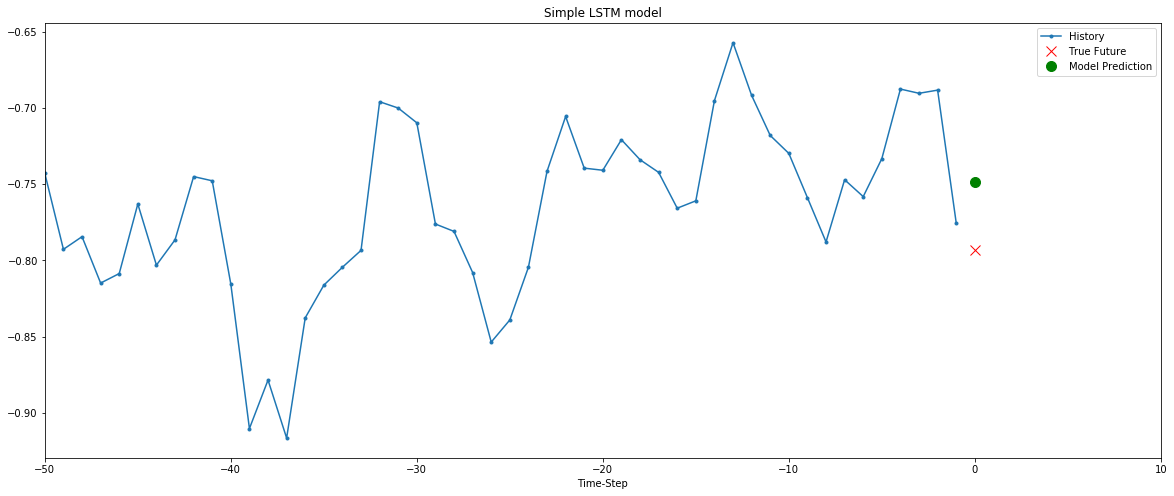

In [162]:
# what is this showing??
for x, y in val_univariate.take(3):
  plt.figure(figsize=(20,8))
  show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')


# Multivariate


In [89]:
#Bringing all features into the dataset
features_considered = ['Open', 'High', 'Low', 'Last', 'Change', 'Settle', 'Volume', 'Previous Day Open Interest',
                     'Open_x', 'High_x', 'Low_x', 'Last_x', 'Change_x', 'Settle_x', 'Volume_x', 'Previous Day Open Interest_x',
                      'Open_y', 'High_y', 'Low_y', 'Last_y', 'Change_y', 'Settle_y', 'Volume_y', 'Previous Day Open Interest_y']       

features = com_merge[features_considered]
features.index = com_merge['Date']
features.head()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Open_x,High_x,...,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-18,445.00,450.00,444.50,449.4,4.2,449.50,140856.0,332167.0,143.125,143.750,...,3170.0,12231.0,170.700,171.950,170.600,171.700,1.225,171.700,2951.0,12118.0
2014-02-19,448.50,455.25,448.25,454.6,4.2,453.75,243252.0,307257.0,143.725,144.400,...,4006.0,11113.0,171.650,172.100,171.000,171.150,0.525,171.175,2357.0,11190.0
2014-02-20,453.25,456.50,451.00,456.2,2.0,455.75,191899.0,268137.0,143.800,144.975,...,2803.0,9330.0,171.475,171.625,170.875,171.100,0.050,171.125,1607.0,10746.0
2014-02-21,455.50,456.50,450.25,452.2,2.6,453.00,145346.0,244376.0,144.950,145.175,...,4086.0,8240.0,171.225,171.600,170.625,170.675,0.425,170.700,1723.0,10249.0
2014-02-24,451.50,452.75,445.50,451.4,1.4,451.50,142118.0,200173.0,144.700,145.500,...,2708.0,6175.0,170.900,171.350,170.150,170.175,0.500,170.200,1969.0,9793.0


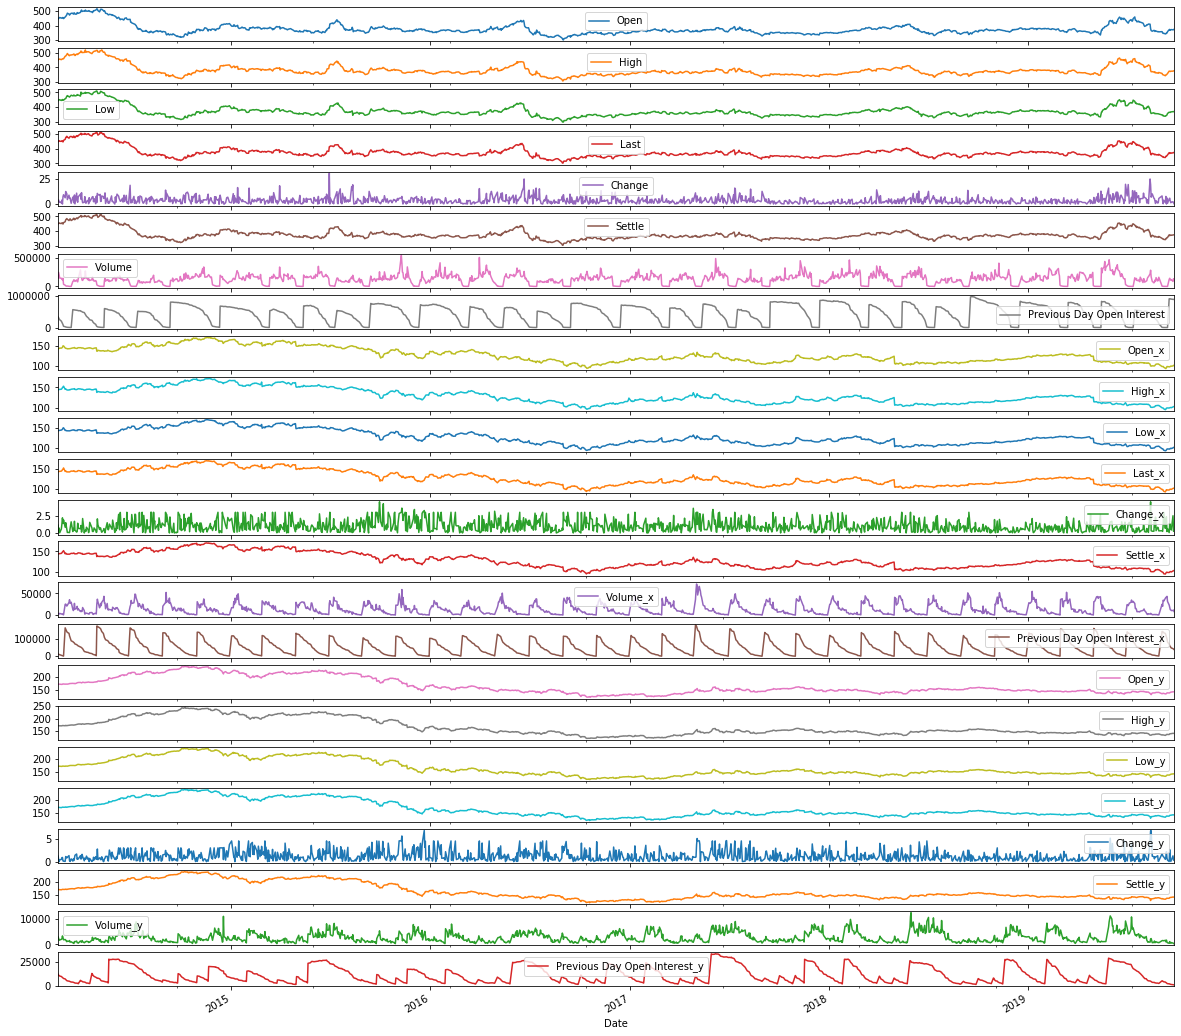

In [91]:
features.plot(subplots=True)
matplotlib.rcParams['figure.figsize'] = (20, 20)

In [93]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [95]:
#SINGLE STEP first

#windowing like with the before task
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [97]:
past_history = 300
future_target = 30
STEP = 1

#BATCH_SIZE = 256
#BUFFER_SIZE = 10000

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [99]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (300, 24)


In [101]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [103]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [105]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(82, 1)


In [107]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 83s 414ms/step - loss: 0.1403 - val_loss: 1.3875
Epoch 2/10
200/200 [==============================] - 90s 449ms/step - loss: 0.0804 - val_loss: 1.3787
Epoch 3/10
200/200 [==============================] - 84s 418ms/step - loss: 0.0659 - val_loss: 1.4250
Epoch 4/10
200/200 [==============================] - 81s 404ms/step - loss: 0.0591 - val_loss: 1.3510
Epoch 5/10
200/200 [==============================] - 80s 399ms/step - loss: 0.0540 - val_loss: 1.4169
Epoch 6/10
200/200 [==============================] - 80s 400ms/step - loss: 0.0500 - val_loss: 1.3731
Epoch 7/10
200/200 [==============================] - 82s 409ms/step - loss: 0.0465 - val_loss: 1.3418
Epoch 8/10
200/200 [==============================] - 79s 394ms/step - loss: 0.0430 - val_loss: 1.3738
Epoch 9/10
200/200 [==============================] - 85s 426ms/step - loss: 0.0407 - val_loss: 1.2377
Epoch 10/10
200/200 [=========

In [158]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()


  plot.show()


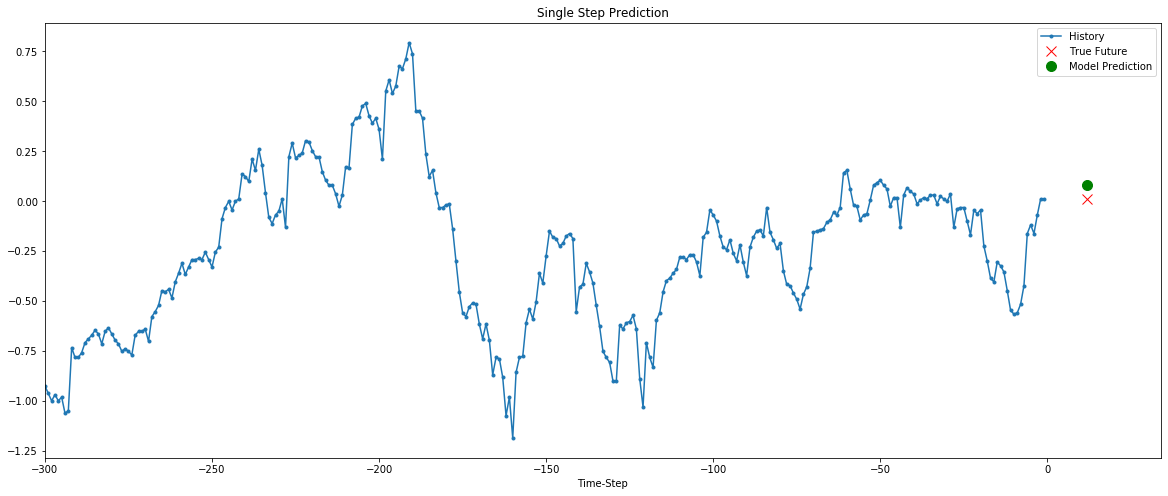

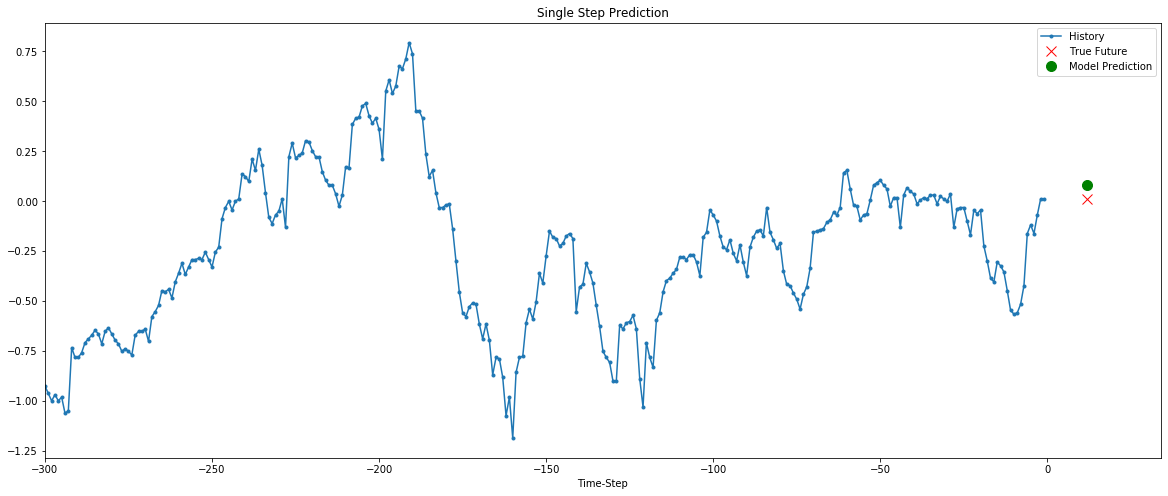

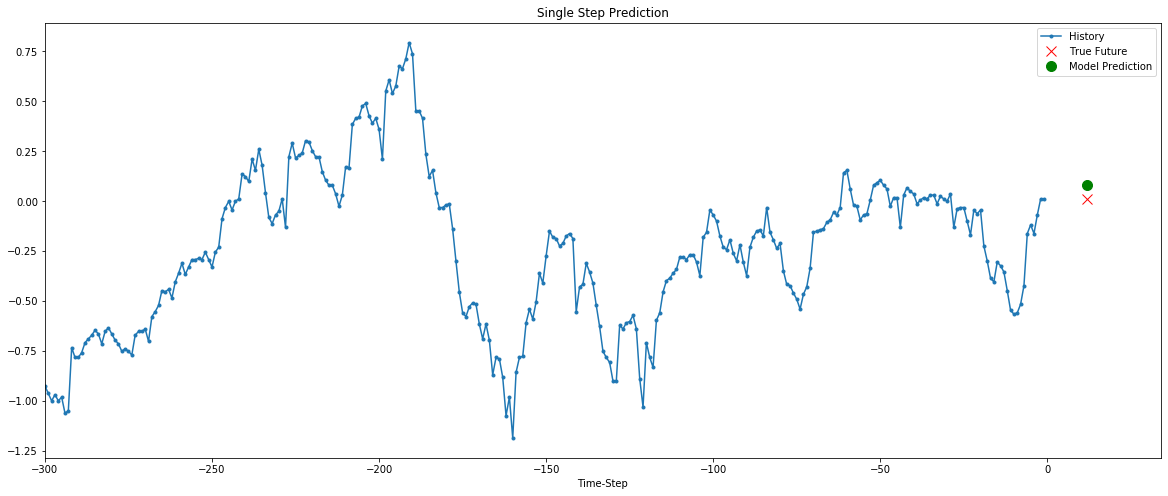

In [163]:
for x, y in val_data_single.take(3):
  plt.figure(figsize=(20,8))
  show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')



# MultiSTEP Model


In [113]:
future_target = 30
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [115]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target closeout to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (300, 24)

 Target closeout to predict : (30,)


In [117]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [118]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

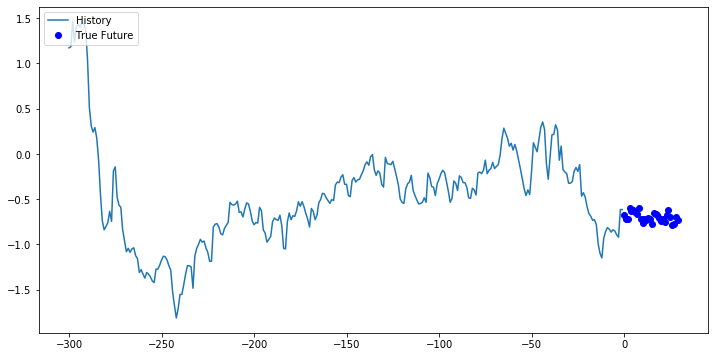

In [119]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [120]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(30))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [121]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 148s 739ms/step - loss: 0.2595 - val_loss: 1.1972
Epoch 2/10
200/200 [==============================] - 139s 696ms/step - loss: 0.1490 - val_loss: 1.0428
Epoch 3/10
200/200 [==============================] - 139s 697ms/step - loss: 0.1256 - val_loss: 1.0421
Epoch 4/10
200/200 [==============================] - 142s 709ms/step - loss: 0.1109 - val_loss: 1.0477
Epoch 5/10
200/200 [==============================] - 143s 714ms/step - loss: 0.1027 - val_loss: 1.0967
Epoch 6/10
200/200 [==============================] - 146s 731ms/step - loss: 0.0968 - val_loss: 1.1334
Epoch 7/10
200/200 [==============================] - 160s 802ms/step - loss: 0.0924 - val_loss: 1.0380
Epoch 8/10
200/200 [==============================] - 157s 783ms/step - loss: 0.0889 - val_loss: 1.1549
Epoch 9/10
200/200 [==============================] - 152s 760ms/step - loss: 0.0862 - val_loss: 1.0891
Epoch 10/10
200/200 [

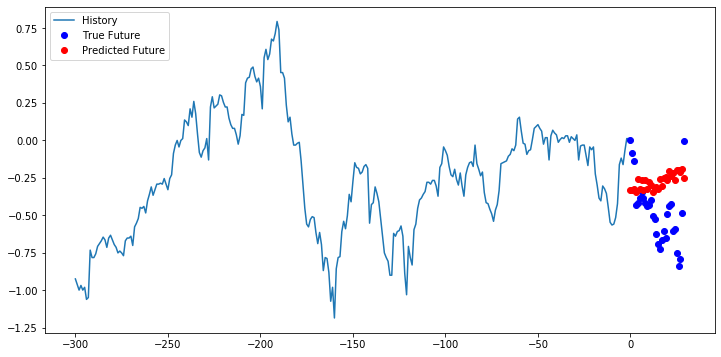

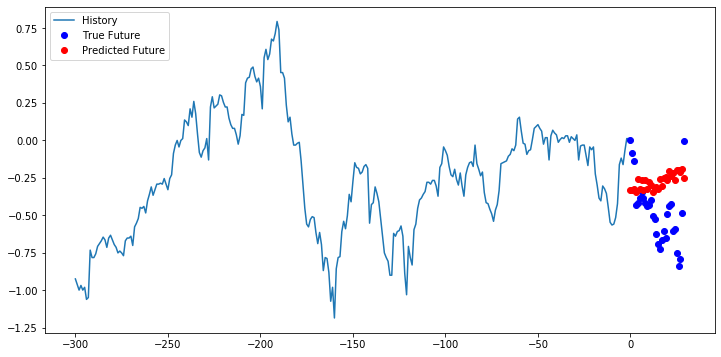

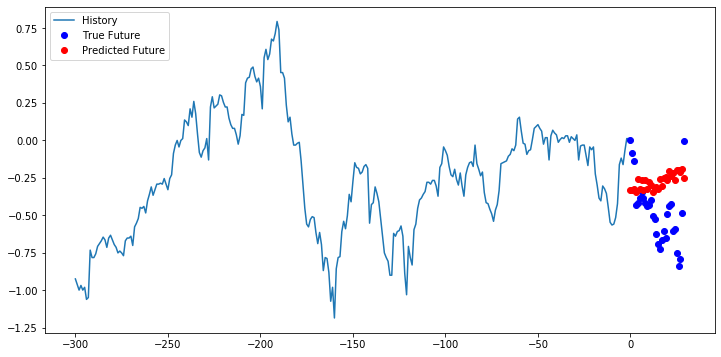

In [122]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [ ]:
#https://www.tensorflow.org/tutorials/structured_data/time_series#part_2_forecast_a_multivariate_time_series

In [ ]:
#LSTM
#https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
#https://medium.com/@vinayarun/from-scratch-an-lstm-model-to-predict-commodity-prices-179e12445c5a
#--> https://www.tensorflow.org/tutorials/structured_data/time_series#part_2_forecast_a_multivariate_time_series

#Stocker and Other
#https://towardsdatascience.com/stock-prediction-in-python-b66555171a2
#https://data-flair.training/blogs/python-for-stock-market/
#https://towardsdatascience.com/how-to-use-machine-learning-to-possibly-become-a-millionaire-predicting-the-stock-market-33861916e9c5
    

In [123]:
live_close = live_data.iloc[0:,6]
live_opn = live_data.iloc[0:,1]
live_high = live_data.iloc[0:,2]
live_low = live_data.iloc[0:,3]
live_time = live_data.iloc[0:,0]

feeder_close = feeder_data.iloc[0:,6]
feeder_opn = feeder_data.iloc[0:,1]
feeder_high = feeder_data.iloc[0:,2]
feeder_low = feeder_data.iloc[0:,3]
feeder_time = feeder_data.iloc[0:,0] 

corn_close = corn_data.iloc[0:,6]
corn_opn = corn_data.iloc[0:,1]
corn_high = corn_data.iloc[0:,2]
corn_low = corn_data.iloc[0:,3]
corn_time = corn_data.iloc[0:,0] 

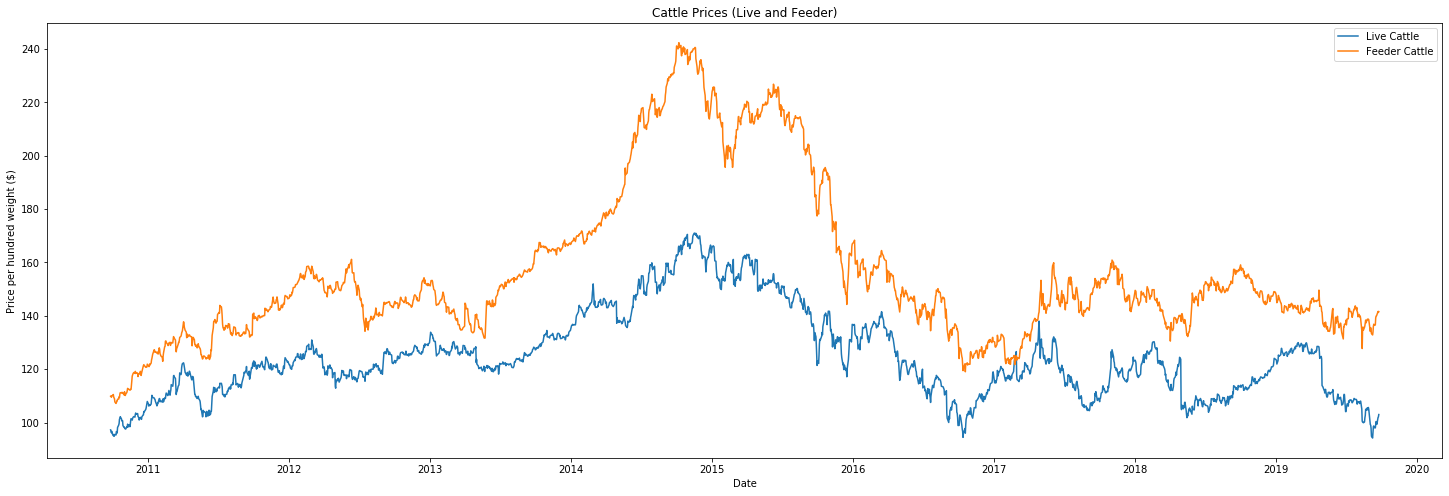

In [150]:
plt.figure(figsize=(25,8))
plt.xlabel("Date")
plt.ylabel("Price per hundred weight ($)")
plt.title('Cattle Prices (Live and Feeder)')
plt.plot(live_time,live_close, label='Live Cattle')
plt.plot(feeder_time,feeder_close, label = 'Feeder Cattle')

plt.legend()
plt.show()

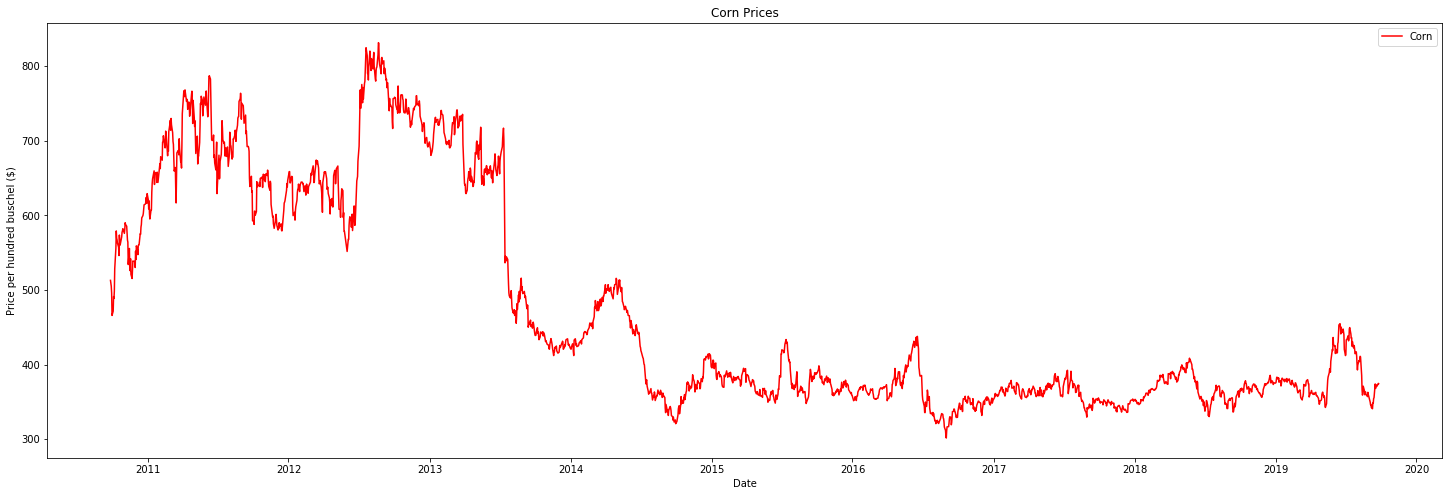

In [152]:
plt.figure(figsize=(25,8))
plt.xlabel("Date")
plt.ylabel("Price per hundred buschel ($)")
plt.title('Corn Prices')
plt.plot(corn_time,corn_close, label = 'Corn', color = 'red')
plt.legend()
plt.show()